In [49]:
from deepcage.compute import (
    plot_trajectories
)
from deepcage.auxiliary.detect import detect_triangulation_result
from deeplabcut.pose_estimation_3d.plotting3D import plot2D

from deepcage.project.get import get_labels, get_paired_labels, get_dlc3d_configs
from deepcage.project.edit import read_config
from deepcage.auxiliary.constants import CAMERAS, PAIR_IDXS, pair_cycler

from deepcage.compute.triangulate import triangulate_basis_labels, triangulate_raw_2d_camera_coords
from deepcage.compute.basis import compute_basis_vectors, create_stereo_cam_origmap
from deepcage.compute.utils import rad_to_deg, unit_vector

import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib notebook

In [2]:
root = os.path.realpath('D:/Can_cage/DeepCage_DLC_files')
config_path = os.path.join(root, 'DeepCageKeyTest-Can-2019-11-15/config.yaml')

#plot_trajectories(config_path, cm_is_real_idx=True, remap=False, cols=2)

dfs = detect_triangulation_result(config_path, change_basis=False)


D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level1_onesided\0_NorthWest_NorthEast
D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level1_onesided\1_NorthEast_EastNorth
D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level1_onesided\2_EastNorth_EastSouth
D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level_1\0_NorthWest_NorthEast
D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level_1\1_NorthEast_EastNorth
D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level_1\2_EastNorth_EastSouth
D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level_1\4_SouthEast_SouthWest
D:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level_1\5_SouthWest_WestSouth


In [27]:
dlc3d_cfgs = get_dlc3d_configs(config_path)
basis_labels = get_labels(config_path)

cfg = read_config(config_path)
test_dir = os.path.join(cfg['data_path'], 'test')

In [4]:
level1 = dfs['level_1']

In [19]:
level1.keys()

dict_keys([('NorthWest', 'NorthEast'), ('NorthEast', 'EastNorth'), ('EastNorth', 'EastSouth'), ('SouthEast', 'SouthWest'), ('SouthWest', 'WestSouth'), ('WestSouth', 'WestNorth')])

In [62]:
pair = ('SouthEast', 'SouthWest')

In [63]:
coords = level1[pair]

In [64]:
tip = coords['tip']

In [65]:
turn = coords['turn']

In [66]:
cam_labels = get_paired_labels(config_path, pair)['normal']

In [67]:
dlc3d_cfg = dlc3d_cfgs[pair]
trian_dict, trian = triangulate_basis_labels(
    dlc3d_cfg, cam_labels, pair, decrement=False, keys=True
)

Calculating the basis vectors of SouthEast SouthWest
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)


In [68]:
trian_dict.keys()

dict_keys([('x-axis', 'positive'), ('x-axis', 'negative'), ('y-axis', 'negative'), 'z-axis', 'origin'])

<IPython.core.display.Javascript object>


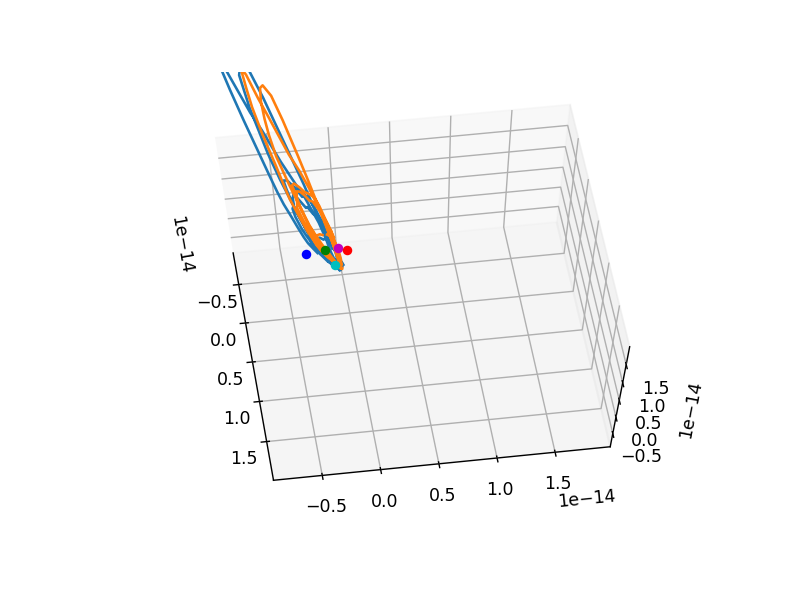

(-1.5395914214829316e-14, 2.5986553727753544e-14)

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot(*tip.T)
ax.plot(*turn.T)

ax.scatter(*trian_dict['origin'], color='g')
ax.scatter(*trian_dict['z-axis'], color='r')
ax.scatter(*trian_dict[('y-axis', 'negative')], color='c')
ax.scatter(*trian_dict[('x-axis', 'positive')], color='m')
ax.scatter(*trian_dict[('x-axis', 'negative')], color='b')


max_ = np.nanmax(tip)
min_ = np.nanmin(tip)

ax.set_xlim(min_, max_)
ax.set_ylim(min_, max_)
ax.set_zlim(min_, max_)